# Lab 3
Github https://github.com/DanielRasho/DS-lab3

Daniel Alfredo Rayo Roldan

Gerardo Gabriel Pineda Riveiro

In [ ]:
# !pip install kagglehub kaggle --quiet

In [ ]:
# !pip install tensorflow
# !pip install keras

In [2]:
import kagglehub
#from google.colab import drive
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
import shutil
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image, ImageEnhance
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import joblib

c:\Users\Gerax\OneDrive\Desktop\UVGG\4-2\Deep\deep\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
print("⬇️ Descargando dataset...")
path = kagglehub.dataset_download("agungpambudi/mnist-multiple-dataset-comprehensive-analysis")
print("✅ Dataset descargado en:", path)

⬇️ Descargando dataset...
✅ Dataset descargado en: /kaggle/input/mnist-multiple-dataset-comprehensive-analysis


In [ ]:
# Aqui estan las imagenes
# base_path = "/kaggle/input/mnist-multiple-dataset-comprehensive-analysis/PolyMNIST/MMNIST/train"

# Analisis Exploratorio
## Ejemplos de las modalidades
### Modalidades 1

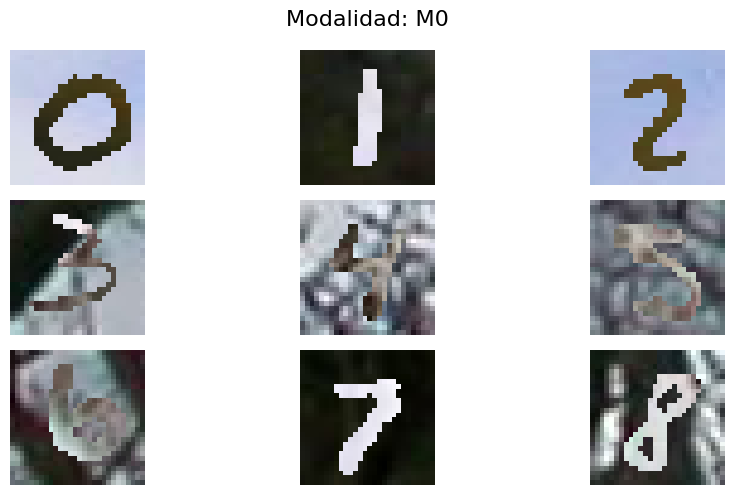

In [ ]:
# DONT RUN AGAIN
folder = os.path.join(base_path, "m0")
files = sorted(os.listdir(folder))[:9]

plt.figure(figsize=(10, 5))
plt.suptitle(f"Modalidad: M0", fontsize=16)

for i in range(9):
    plt.subplot(330+1+i)
    filename = os.path.join(folder, files[i])
    image = imread(filename)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


### Modalidad 2

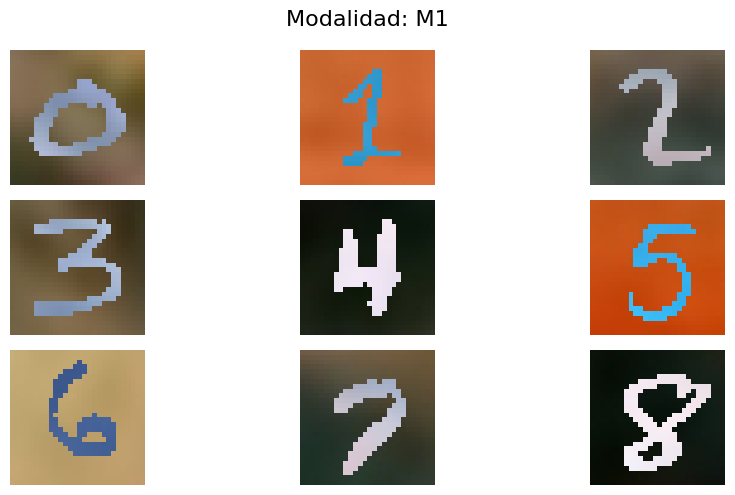

In [ ]:

# DONT RUN AGAIN
folder = os.path.join(base_path, "m1")
files = sorted(os.listdir(folder))[:9]

plt.figure(figsize=(10, 5))
plt.suptitle(f"Modalidad: M1", fontsize=16)

for i in range(9):
    plt.subplot(330+1+i)
    filename = os.path.join(folder, files[i])
    image = imread(filename)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


#### Modalidad 3

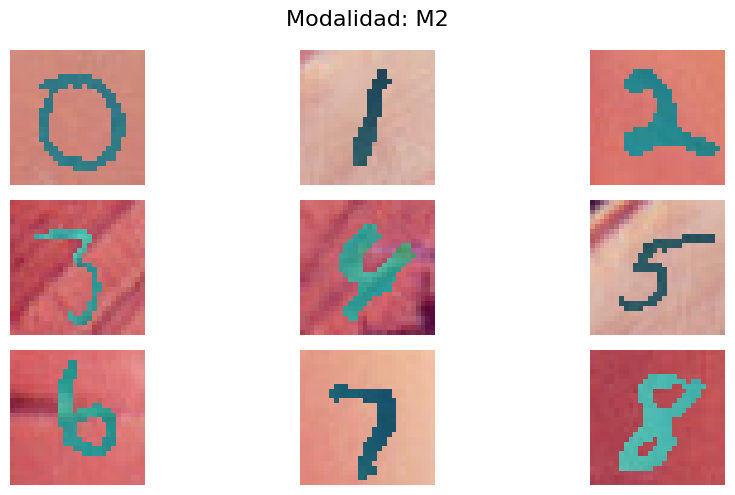

In [ ]:

# DONT RUN AGAIN
folder = os.path.join(base_path, "m2")
files = sorted(os.listdir(folder))[:9]

plt.figure(figsize=(10, 5))
plt.suptitle(f"Modalidad: M2", fontsize=16)

for i in range(9):
    plt.subplot(330+1+i)
    filename = os.path.join(folder, files[i])
    image = imread(filename)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


#### Modalidad 4

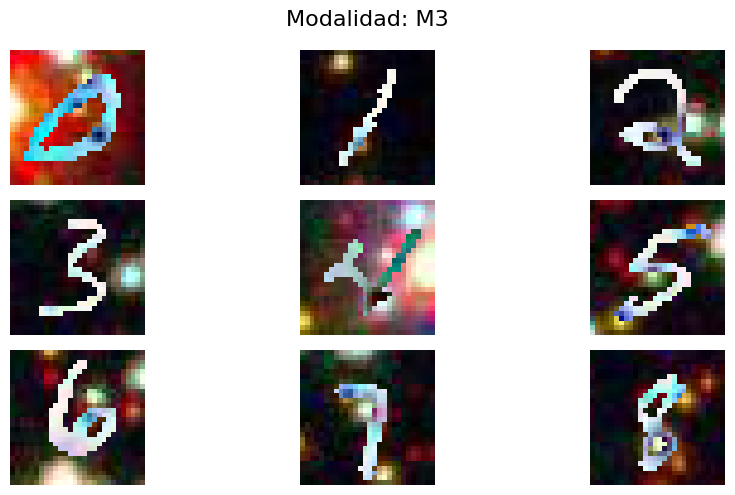

In [ ]:

# DONT RUN AGAIN
folder = os.path.join(base_path, "m3")
files = sorted(os.listdir(folder))[:9]

plt.figure(figsize=(10, 5))
plt.suptitle(f"Modalidad: M3", fontsize=16)

for i in range(9):
    plt.subplot(330+1+i)
    filename = os.path.join(folder, files[i])
    image = imread(filename)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


#### Modalidad 5

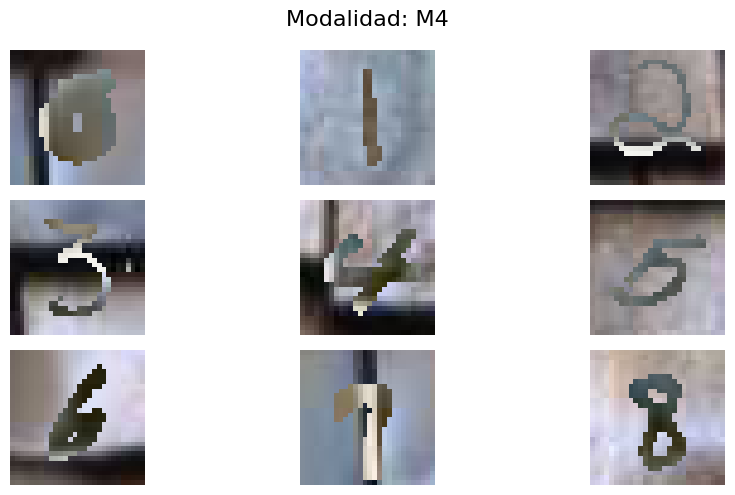

In [ ]:

# DONT RUN AGAIN
folder = os.path.join(base_path, "m4")
files = sorted(os.listdir(folder))[:9]

plt.figure(figsize=(10, 5))
plt.suptitle(f"Modalidad: M4", fontsize=16)

for i in range(9):
    plt.subplot(330+1+i)
    filename = os.path.join(folder, files[i])
    image = imread(filename)
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


# Transformación de la estructura de las imagenes

In [ ]:
# DONT YOU DARE RUN IT AGAIN!!!

# Rutas base
BASE_PATH = "./original_dataset/PolyMNIST/MMNIST"
OUTPUT_PATH = "./data"

# Conjuntos a procesar
datasets = ["train", "test"]

# Función para contar archivos
def contar_archivos(path):
    folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]
    return sum(
        len([file for file in os.listdir(os.path.join(path, folder)) if file.lower().endswith(('.png', '.jpg', '.jpeg'))])
        for folder in folders
    )

# Calcular archivos totales para ambas carpetas
total_files = sum(contar_archivos(os.path.join(BASE_PATH, ds)) for ds in datasets)

# Usar tqdm para mostrar progreso
with tqdm(total=total_files, desc="Reorganizando dataset", unit="archivo") as pbar:
    for ds in datasets:
        dataset_path = os.path.join(BASE_PATH, ds)
        output_ds_path = os.path.join(OUTPUT_PATH, ds)

        # Crear carpetas de salida (0 a 9) dentro de train/ o test/
        for i in range(10):
            os.makedirs(os.path.join(output_ds_path, str(i)), exist_ok=True)

        # Obtener todas las carpetas internas (m0, m1, ...)
        folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]

        for folder in folders:
            folder_path = os.path.join(dataset_path, folder)

            for file in os.listdir(folder_path):
                if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    try:
                        number = file.split('.')[-2]  # Ej: "imagen.5.png" -> "5"
                        number = int(number)
                    except ValueError:
                        print(f"⚠️ No se pudo extraer número de {file}")
                        pbar.update(1)
                        continue

                    # Rutas de origen y destino
                    prefix = folder_path.split('/')[-1]
                    final_file_name = f"{prefix}.{file}"
                    src = os.path.join(folder_path, file)
                    dst = os.path.join(output_ds_path, str(number), final_file_name)

                    # Copiar archivo a la carpeta correcta
                    shutil.copy2(src, dst)

                    # Actualizar barra de progreso
                    pbar.update(1)

print("✅ Dataset reorganizado correctamente en carpetas train/ y test/, separadas por dígitos (0-9).")


Reorganizando dataset: 100%|██████████| 350000/350000 [01:09<00:00, 5027.60archivo/s]

✅ Dataset reorganizado correctamente en carpetas train/ y test/, separadas por dígitos (0-9).


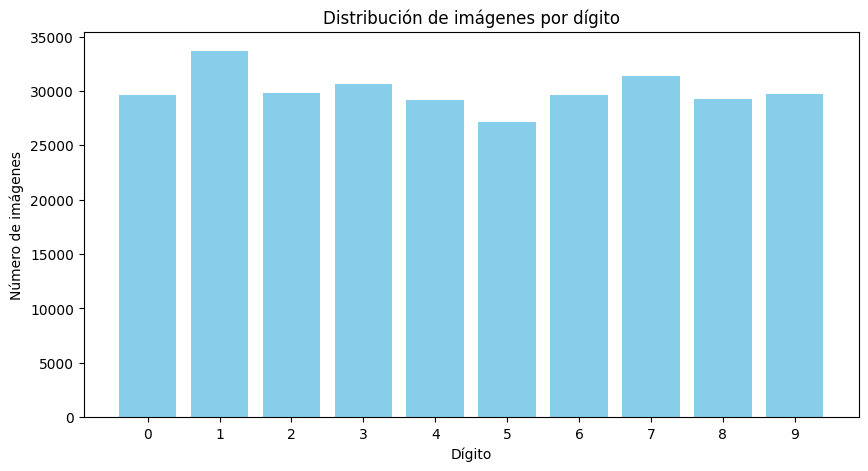

In [ ]:
# DONT RUN IT AGAIN

dataset_path = "./data/train"
digit_counts = {}

# Contar archivos por carpeta (clase)
for digit in sorted(os.listdir(dataset_path)):
    digit_path = os.path.join(dataset_path, digit)
    if os.path.isdir(digit_path):
        digit_counts[digit] = len(os.listdir(digit_path))

# Visualizar distribución
plt.figure(figsize=(10, 5))
plt.bar(digit_counts.keys(), digit_counts.values(), color='skyblue')
plt.title("Distribución de imágenes por dígito")
plt.xlabel("Dígito")
plt.ylabel("Número de imágenes")
plt.show()


Se puede observar como el dataset esta relativamente balanceado, el que tiene mas datos es el 1 y el que tiene menos datos es el 5 pero esto no representa ninguna diferencia extremadamente grande como para ser considerada

In [22]:
sizes = []
for digit in os.listdir(dataset_path):
    digit_path = os.path.join(dataset_path, digit)
    if os.path.isdir(digit_path):
        img_name = os.listdir(digit_path)[0]
        img_path = os.path.join(digit_path, img_name)
        with Image.open(img_path) as img:
            sizes.append(img.size)

print("Tamaños únicos de imágenes en la muestra:", set(sizes))

Tamaños únicos de imágenes en la muestra: {(28, 28)}


De la muestra tomada, se encontró que el único tamaño presente en las imágenes es 28x28 píxeles, lo que indica que todas las imágenes del dataset tienen dimensiones homogéneas y están previamente estandarizadas.

Processing images: 100%|██████████| 30000/30000 [00:11<00:00, 2722.90it/s]


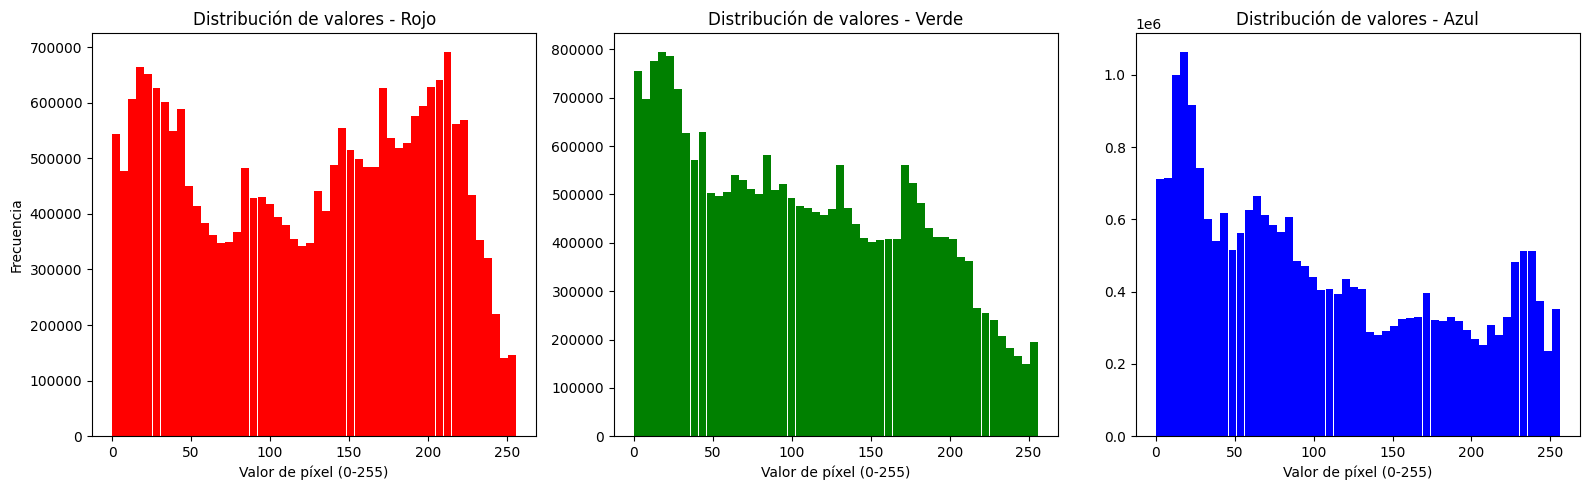

In [ ]:
# DONT RUN AGAIN
# Dataset path
dataset_path = 'data/train'
MAX_IMAGES = 30000
BINS = 50

# Initialize histogram bins
bin_edges = np.linspace(0, 256, BINS + 1)
r_hist = np.zeros(BINS)
g_hist = np.zeros(BINS)
b_hist = np.zeros(BINS)

# Collect and shuffle all image paths
all_image_paths = [
    os.path.join(os.path.join(dataset_path, digit), fname)
    for digit in sorted(os.listdir(dataset_path))
    for fname in os.listdir(os.path.join(dataset_path, digit))
]

random.shuffle(all_image_paths)
selected_paths = all_image_paths[:MAX_IMAGES]

# Process images in a memory-efficient way
for img_path in tqdm(selected_paths, desc="Processing images"):
    try:
        img = Image.open(img_path).convert('RGB')
        arr = np.array(img)  # shape: (28, 28, 3)
        r, g, b = arr[:,:,0], arr[:,:,1], arr[:,:,2]

        # Update histograms
        r_hist += np.histogram(r, bins=bin_edges)[0]
        g_hist += np.histogram(g, bins=bin_edges)[0]
        b_hist += np.histogram(b, bins=bin_edges)[0]

    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        continue

# Plotting the results
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.bar(bin_centers, r_hist, width=5, color='red')
plt.title("Distribución de valores - Rojo")
plt.xlabel("Valor de píxel (0-255)")
plt.ylabel("Frecuencia")

plt.subplot(1, 3, 2)
plt.bar(bin_centers, g_hist, width=5, color='green')
plt.title("Distribución de valores - Verde")
plt.xlabel("Valor de píxel (0-255)")

plt.subplot(1, 3, 3)
plt.bar(bin_centers, b_hist, width=5, color='blue')
plt.title("Distribución de valores - Azul")
plt.xlabel("Valor de píxel (0-255)")

plt.tight_layout()
plt.show()

Arriba se encuentra histograma de valores de píxeles para los canales rojo, verde y azul para una muestra de 30,000 imagenes. Se puede observar que los valores de 0 a 40 son los más populares con diferencia en los 3 canales, indicando que las tonalidades oscuras son comunes en las imagenes, o que hay imagenes donde un canal predomina más que los demás. También es interesante notar que el canal rojo presenta la mayor cantidad de pixeles con intensidad entre 180 a 220, es decir la mayoría de imagenes tienen tonalidades cálidas, los siguientes colores más intensos son el verde y el azul, siendo este último el menos intenso.

## Aumento de imagenes

## Cargado de datos

In [5]:
# Paths
train_dir = "./data/data/train"
test_dir = "./data/data/test"

# Image parameters
img_height = 28
img_width = 28
batch_size = 64
val_split = 0.2  # 20% of training data used for validation

# Training dataset (split)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=val_split,
    subset="training",
    seed=42,  # Ensures reproducibility of split
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=val_split,
    subset="validation",
    seed=42,
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=True
)

# Test dataset (left untouched)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False
)

num_classes = len(train_ds.class_names)

# Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 302700 files belonging to 10 classes.
Using 242160 files for training.
Found 302700 files belonging to 10 classes.
Using 60540 files for validation.
Found 50446 files belonging to 10 classes.


# Modelos con Redes Convolucionales

In [ ]:
cnn_model_1 = models.Sequential([
    layers.Rescaling(1./255, input_shape=(28, 28, 3)),  # Normalize RGB [0,255] → [0,1]
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 digit classes
])

cnn_model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn_model_1.summary()


/home/smaug/Documents/DataScience/lab3/.venv/lib/python3.13/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 28, 28, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
model_path = "./models/CNN_model1.keras"

cnn_model_1 = ""

if os.path.exists(model_path):
    print("🔁 Loading pre-trained model...")
    cnn_model_1 = keras.models.load_model(model_path)
else: 
    history = cnn_model_1.fit(
        train_ds,
        validation_data=val_ds,
        epochs=8
    )

    cnn_model_1.save("./models/CNN_model1.keras")

🔁 Loading pre-trained model...


In [ ]:
# DONT RUN AGAIN
test_loss, test_acc = cnn_model_1.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")

789/789 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9782 - loss: 0.1893
Test accuracy: 0.9782


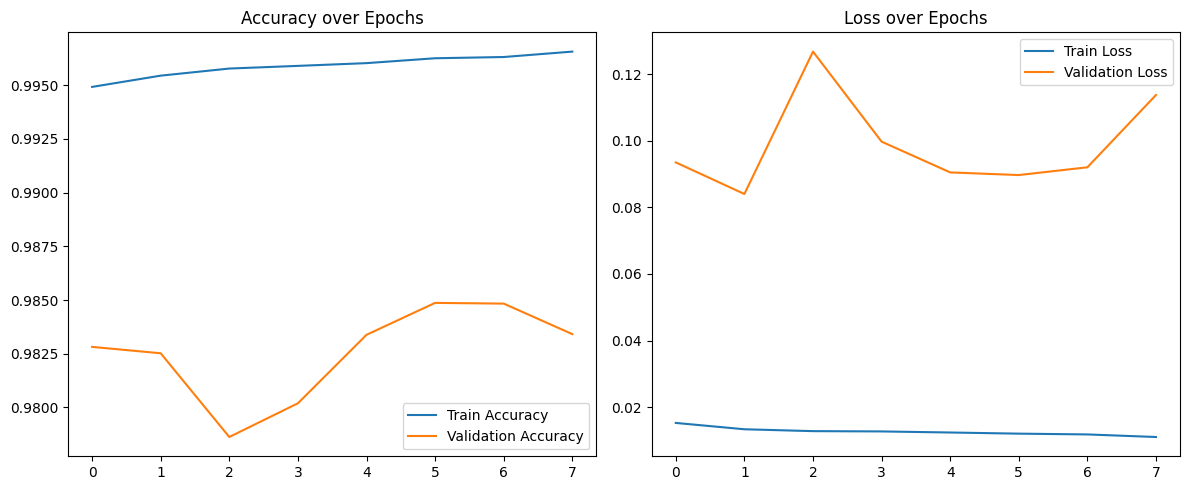

In [ ]:
# DONT RUN AGAIN
# --- Plot learning curves ---
def plot_learning_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Accuracy over Epochs')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Loss over Epochs')

    plt.tight_layout()
    plt.show()

plot_learning_curves(history)

2025-08-02 20:09:27.653263: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Classification Report:
              precision    recall  f1-score   support

           0     0.9822    0.9896    0.9859      4900
           1     0.9894    0.9930    0.9912      5731
           2     0.9837    0.9735    0.9786      5211
           3     0.9546    0.9902    0.9721      5100
           4     0.9816    0.9764    0.9790      4959
           5     0.9799    0.9740    0.9770      4504
           6     0.9873    0.9775    0.9823      4837
           7     0.9747    0.9780    0.9763      5191
           8     0.9848    0.9591    0.9718      4918
           9     0.9646    0.9678    0.9662      5095

    accuracy                         0.9782     50446
   macro avg     0.9783    0.9779    0.9780     50446
weighted avg     0.9783    0.9782    0.9782     50446



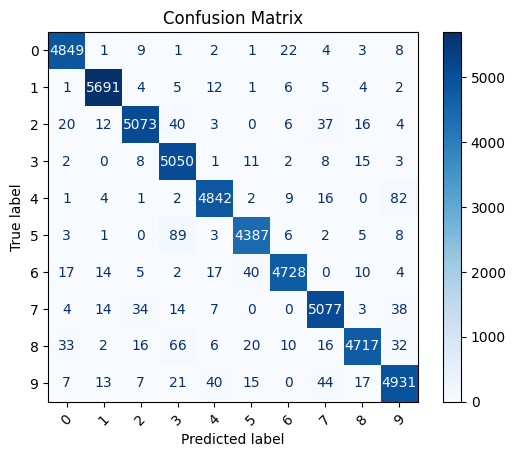

In [ ]:
# DONT RUN AGAIN
# Get predictions and true labels
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = cnn_model_1.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

### CNN segundo modelo

In [ ]:
cnn_model_2 = models.Sequential([
    layers.Rescaling(1./255, input_shape=(28, 28, 3)),  # Normalize RGB [0,255] → [0,1]
    
    # Only one convolutional block
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Fully connected layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

cnn_model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn_model_2.summary()

/home/smaug/Documents/DataScience/lab3/.venv/lib/python3.13/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 28, 28, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,722 (1.33 MB)

 Trainable params: 347,722 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
model2_path = "./models/CNN_model2.keras"

cnn_model_2 = ""

if os.path.exists(model2_path):
    print("🔁 Loading pre-trained model...")
    cnn_model_2 = keras.models.load_model(model2_path)
else: 
    history = cnn_model_2.fit(
        train_ds,
        validation_data=val_ds,
        epochs=8
    )

    cnn_model_2.save(model2_path)

🔁 Loading pre-trained model...


In [ ]:
test_loss, test_acc = cnn_model_1.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")

789/789 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9782 - loss: 0.1893
Test accuracy: 0.9782


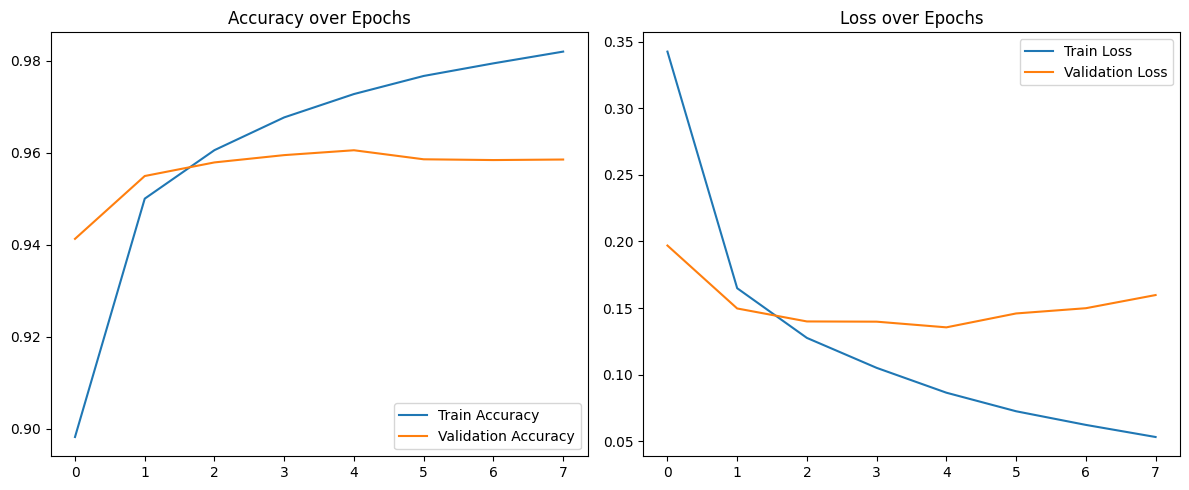

In [15]:
# --- Plot learning curves ---
def plot_learning_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Accuracy over Epochs')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Loss over Epochs')

    plt.tight_layout()
    plt.show()

plot_learning_curves(history)

2025-08-02 20:36:28.111464: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence



Classification Report:
              precision    recall  f1-score   support

           0     0.9831    0.9510    0.9668      4900
           1     0.9824    0.9717    0.9770      5731
           2     0.9556    0.9503    0.9529      5211
           3     0.8995    0.9720    0.9343      5100
           4     0.9479    0.9718    0.9597      4959
           5     0.9184    0.9640    0.9406      4504
           6     0.9723    0.9580    0.9651      4837
           7     0.9614    0.9499    0.9556      5191
           8     0.9596    0.9140    0.9363      4918
           9     0.9501    0.9237    0.9367      5095

    accuracy                         0.9528     50446
   macro avg     0.9530    0.9526    0.9525     50446
weighted avg     0.9536    0.9528    0.9529     50446



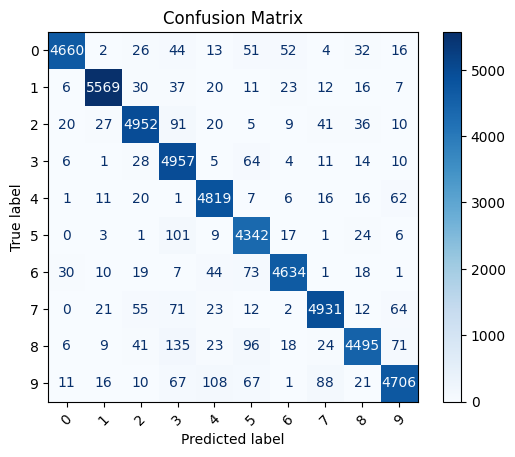

In [ ]:
# Get predictions and true labels
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = cnn_model_2.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

### KNN

In [ ]:
# DONT RUN AGAIN
img_height, img_width = 28, 28
max_samples_per_class = 2000  # Reduce if needed for RAM

# Function to load flattened images and labels
def load_flattened_images(directory, max_per_class=None):
    images, labels = [], []
    for label in sorted(os.listdir(directory)):
        digit_dir = os.path.join(directory, label)
        files = os.listdir(digit_dir)
        if max_per_class:
            files = random.sample(files, min(max_per_class, len(files)))
        for file in files:
            img_path = os.path.join(digit_dir, file)
            img = tf.keras.utils.load_img(img_path, target_size=(img_height, img_width))
            img_array = tf.keras.utils.img_to_array(img) / 255.0
            images.append(img_array.flatten())
            labels.append(int(label))
    return np.array(images), np.array(labels)

# Load training and test data (smaller subset)
X_train, y_train = load_flattened_images('./data/train', max_per_class=max_samples_per_class)
X_test, y_test = load_flattened_images('./data/test', max_per_class=200)  # Keep test small for now


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       200
           1       0.40      0.91      0.56       200
           2       0.66      0.54      0.60       200
           3       0.65      0.60      0.62       200
           4       0.67      0.61      0.64       200
           5       0.74      0.49      0.59       200
           6       0.86      0.71      0.78       200
           7       0.71      0.64      0.67       200
           8       0.71      0.42      0.53       200
           9       0.57      0.52      0.55       200

    accuracy                           0.63      2000
   macro avg       0.67      0.63      0.63      2000
weighted avg       0.67      0.63      0.63      2000



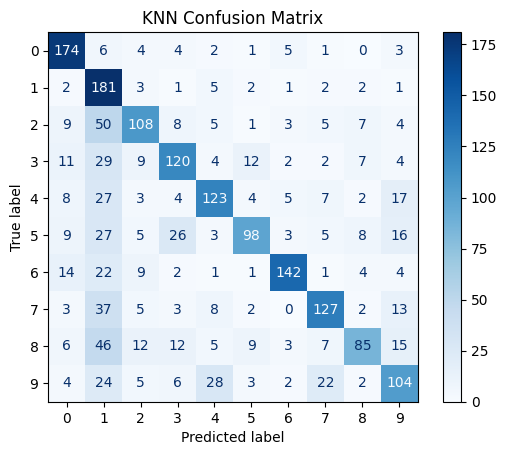

In [ ]:
# DONT RUN AGAIN

# Train a simple KNN (try k=3 or 5)
knn = KNeighborsClassifier(n_neighbors=4)

# Train the model
knn_model_1 = ""

knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

## Aumento de imágenes

In [ ]:
# DONT YOU DARE RUN IT AGAIN!!!!!!

# Base dataset path
BASE_PATH = "./data"
AUGMENT_PERCENT = 0.01  # 5%
PREFIX = "a"

def augment_image(img):
    # Random crop
    width, height = img.size
    crop_ratio = random.uniform(0.85, 0.95)  # 90%-100% crop
    crop_w = int(width * crop_ratio)
    crop_h = int(height * crop_ratio)

    left = random.randint(0, width - crop_w)
    top = random.randint(0, height - crop_h)
    right = left + crop_w
    bottom = top + crop_h

    img_cropped = img.crop((left, top, right, bottom))
    img_resized = img_cropped.resize((width, height))

    # Random brightness adjustment
    enhancer = ImageEnhance.Brightness(img_resized)
    img_bright = enhancer.enhance(random.uniform(0.9, 1.1))

    return img_bright

# Traverse dataset
for split in ["train", "test"]:
    for category in ["1", "2", "3", "4", "5", "6", "7", "8", "9"]:
        folder = os.path.join(BASE_PATH, split, category)
        images = [f for f in os.listdir(folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        num_to_augment = int(len(images) * AUGMENT_PERCENT)
        selected = random.sample(images, num_to_augment)

        print(f"🔄 Augmenting {num_to_augment} images in {split}/{category}...")

        for img_name in tqdm(selected, desc=f"{split}/{category}", unit="img"):
            img_path = os.path.join(folder, img_name)
            try:
                img = Image.open(img_path).convert("RGB")
                augmented = augment_image(img)

                new_name = PREFIX + img_name
                new_path = os.path.join(folder, new_name)
                augmented.save(new_path)
            except Exception as e:
                print(f"❌ Error processing {img_path}: {e}")

print("✅ All augmentations completed.")


🔄 Augmenting 337 images in train/1...


train/1:   0%|          | 0/337 [00:00<?, ?img/s]

train/1: 100%|██████████| 337/337 [00:00<00:00, 1103.10img/s]


🔄 Augmenting 297 images in train/2...


train/2: 100%|██████████| 297/297 [00:00<00:00, 1803.01img/s]


🔄 Augmenting 306 images in train/3...


train/3: 100%|██████████| 306/306 [00:00<00:00, 1651.52img/s]

🔄 Augmenting 292 images in train/4...



train/4: 100%|██████████| 292/292 [00:00<00:00, 1973.74img/s]


🔄 Augmenting 271 images in train/5...


train/5: 100%|██████████| 271/271 [00:00<00:00, 2044.71img/s]


🔄 Augmenting 295 images in train/6...


train/6: 100%|██████████| 295/295 [00:00<00:00, 1762.62img/s]


🔄 Augmenting 313 images in train/7...


train/7: 100%|██████████| 313/313 [00:00<00:00, 1925.99img/s]


🔄 Augmenting 292 images in train/8...


train/8: 100%|██████████| 292/292 [00:00<00:00, 1701.87img/s]


🔄 Augmenting 297 images in train/9...


train/9: 100%|██████████| 297/297 [00:00<00:00, 1547.84img/s]


🔄 Augmenting 56 images in test/1...


test/1: 100%|██████████| 56/56 [00:00<00:00, 1673.56img/s]


🔄 Augmenting 51 images in test/2...


test/2: 100%|██████████| 51/51 [00:00<00:00, 1888.08img/s]


🔄 Augmenting 50 images in test/3...


test/3: 100%|██████████| 50/50 [00:00<00:00, 1633.83img/s]


🔄 Augmenting 49 images in test/4...


test/4: 100%|██████████| 49/49 [00:00<00:00, 1564.44img/s]


🔄 Augmenting 44 images in test/5...


test/5: 100%|██████████| 44/44 [00:00<00:00, 2201.31img/s]


🔄 Augmenting 47 images in test/6...


test/6: 100%|██████████| 47/47 [00:00<00:00, 1451.08img/s]


🔄 Augmenting 51 images in test/7...


test/7: 100%|██████████| 51/51 [00:00<00:00, 1729.83img/s]


🔄 Augmenting 48 images in test/8...


test/8: 100%|██████████| 48/48 [00:00<00:00, 1608.03img/s]


🔄 Augmenting 50 images in test/9...


test/9: 100%|██████████| 50/50 [00:00<00:00, 1426.60img/s]

✅ All augmentations completed.


## Red neuronal simple

In [9]:
rnns = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(28, 28, 3)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

c:\Users\Gerax\OneDrive\Desktop\UVGG\4-2\Deep\deep\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
rnns.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = rnns.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
3784/3784 ━━━━━━━━━━━━━━━━━━━━ 671s 177ms/step - accuracy: 0.5484 - loss: 1.3375 - val_accuracy: 0.7545 - val_loss: 0.7671
Epoch 2/10
3784/3784 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.7563 - loss: 0.7589 - val_accuracy: 0.7908 - val_loss: 0.6600
Epoch 3/10
3784/3784 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.7881 - loss: 0.6628 - val_accuracy: 0.7982 - val_loss: 0.6291
Epoch 4/10
3784/3784 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.8030 - loss: 0.6149 - val_accuracy: 0.8074 - val_loss: 0.6072
Epoch 5/10
3784/3784 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.8137 - loss: 0.5808 - val_accuracy: 0.8221 - val_loss: 0.5611
Epoch 6/10
3784/3784 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.8220 - loss: 0.5553 - val_accuracy: 0.8215 - val_loss: 0.5616
Epoch 7/10
3784/3784 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.8298 - loss: 0.5340 - val_accuracy: 0.8266 - val_loss: 0.5455
Epoch 8/10
3784/3784 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.8346 - loss

In [11]:
test_loss, test_acc = rnns.evaluate(test_ds, verbose=2)
print(f"\nPrecisión del modelo simple (MLP): {test_acc:.4f}")

rnns.save("./models/RNN_simple_model1.keras")

789/789 - 141s - 179ms/step - accuracy: 0.8343 - loss: 0.5240

Precisión del modelo simple (MLP): 0.8343


Se puede obsrvar como el modelo de redes neuronales simples a pesar de no ser incorporar mas capas que procesan datos en pequeñas regiones. Tuvo un buen rendimiento con mas epocas de entrenamiento que las redes convolucionales. Esto demuestra como un perceptrón multicapa puede alcanzar buenos resultados en clasificación. 

In [4]:
# Train the model
model2_path = "./models/RNN_simple_model1.keras"

rnns = ""

if os.path.exists(model2_path):
    print("🔁 Loading pre-trained model...")
    rnns = keras.models.load_model(model2_path)
else: 
    # history = cnn_model_2.fit(
    #     train_ds,
    #     validation_data=val_ds,
    #     epochs=8
    # )

    # cnn_model_2.save(model2_path)
    pass

🔁 Loading pre-trained model...



Classification Report:
              precision    recall  f1-score   support

           0     0.8777    0.8776    0.8776      4900
           1     0.8762    0.9042    0.8900      5731
           2     0.8301    0.8033    0.8165      5211
           3     0.7862    0.8492    0.8165      5100
           4     0.8220    0.8502    0.8358      4959
           5     0.8540    0.7544    0.8011      4504
           6     0.8524    0.8896    0.8706      4837
           7     0.8480    0.8287    0.8383      5191
           8     0.7838    0.7916    0.7877      4918
           9     0.8135    0.7800    0.7964      5095

    accuracy                         0.8343     50446
   macro avg     0.8344    0.8329    0.8330     50446
weighted avg     0.8346    0.8343    0.8339     50446



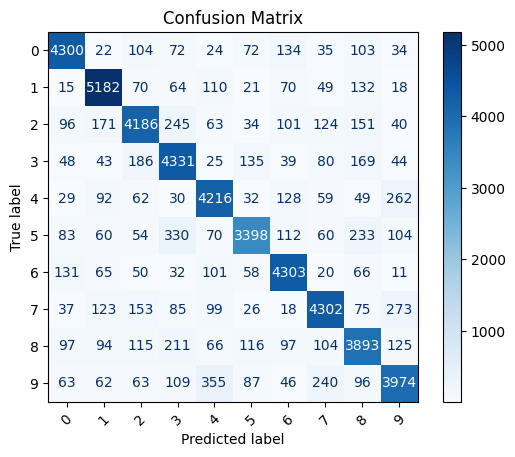

In [6]:
# Get predictions and true labels
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = rnns.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, digits=4))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

Como era de esperarse el modelo de redes neuronales simple logro un rendimiento aceptable en todas las clases de numeros. En se observa que tiene más fallas en comparación al resto es el numero 3 y el numero 8.